## Employee Business Travel Classification Model (Support Vector Machines) Classification Model

##### The main purpose of this model is to group employees depending on the frequency to travel i.e: 
1 - Travel_Rarely 
2 - Travel_Frequently 
3 - Non-Travel

### Loading the required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline 

### Loading the data 

In [21]:
df = pd.read_excel("HR Employee Attrition 1.xlsx")
df.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,2,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,2,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,1,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


### Cleaning the data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   int64 
 2   DailyRate                 1470 non-null   int64 
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EmployeeCount             1470 non-null   int64 
 6   EmployeeNumber            1470 non-null   int64 
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   HourlyRate                1470 non-null   int64 
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   int64 
 14  MonthlyIncome           

##### From the results above, the dataset has no null values

In [27]:
# checking for any duplicates

df.duplicated().sum()

0

<Axes: >

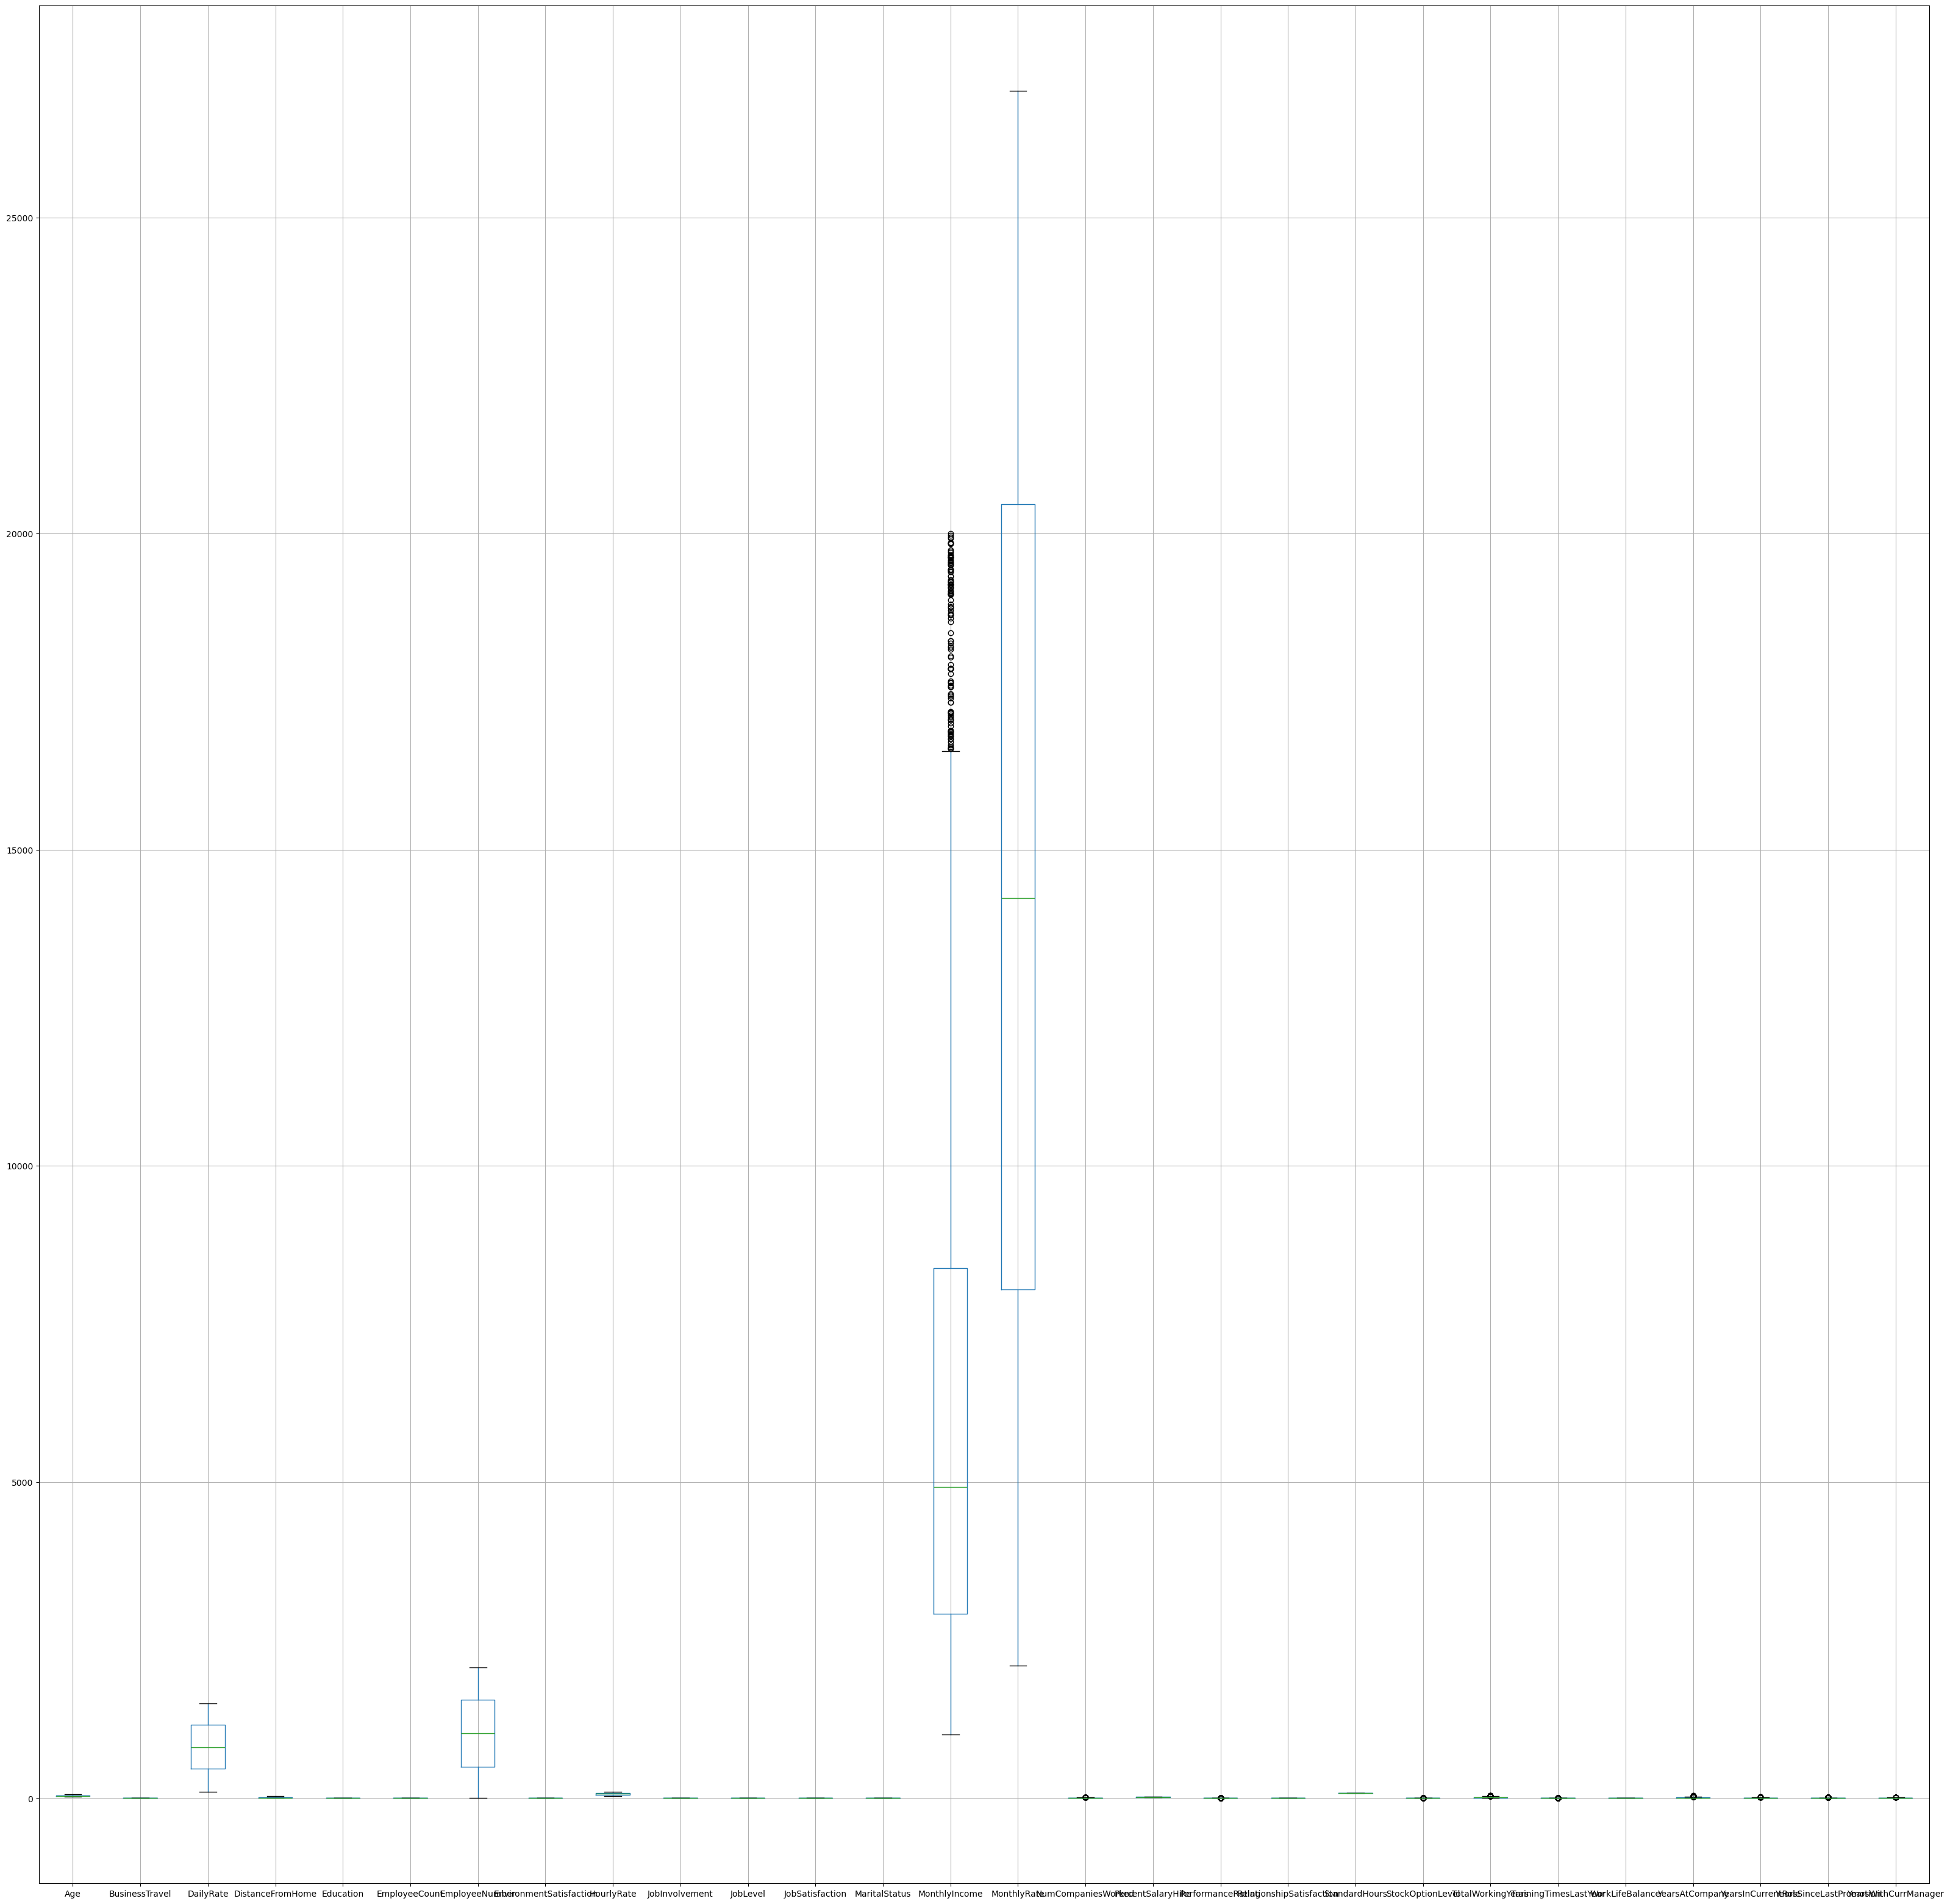

In [35]:
# checking for any outliers

plt.figure(figsize = (40,40))
df.boxplot()

##### There are some outliers detected in the monthly income column that need to be removed.

In [38]:
# calculating the interquartile range

q3 = df["MonthlyIncome"].quantile(0.75)
q1 = df["MonthlyIncome"].quantile(0.25)

iqr = q3 - q1

In [40]:
print("Inter-Quartile Range:", iqr)

Inter-Quartile Range: 5468.0


In [42]:
## calculating the upper and lower limits

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

In [46]:
## detecting the outliers

df.loc[(df["MonthlyIncome"] > upper_limit) | (df["MonthlyIncome"] < lower_limit)]

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,1,1282,5,3,1,32,3,58,3,...,4,80,1,26,3,2,14,13,4,8
29,46,1,705,2,4,1,38,2,83,3,...,4,80,0,22,2,2,2,2,2,1
45,41,1,1360,12,3,1,58,2,49,3,...,4,80,0,23,0,3,22,15,15,8
62,50,1,989,7,2,1,80,2,43,2,...,4,80,1,29,2,2,27,3,13,8
105,59,3,1420,2,4,1,140,3,32,2,...,4,80,1,30,3,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,58,1,605,21,3,1,1938,4,72,3,...,3,80,1,29,2,2,1,0,0,0
1377,49,2,1064,2,1,1,1941,2,42,3,...,4,80,0,28,3,3,5,4,4,3
1401,55,1,189,26,4,1,1973,3,71,4,...,1,80,1,35,0,3,10,9,1,4
1437,39,3,105,9,3,1,2022,4,87,3,...,3,80,0,21,3,2,6,0,1,3


In [48]:
## dealing with the outliers

df1 = df.loc[(df["MonthlyIncome"] < upper_limit) & (df["MonthlyIncome"] > lower_limit)]

In [50]:
print("Before removing outliers:", len(df))
print("After removing outliers:", len(df1))
print("Outliers:", len(df) - len(df1))

Before removing outliers: 1470
After removing outliers: 1356
Outliers: 114


### Building the SVM Model

In [65]:
df2 = df1.drop(["JobRole", "OverTime"], axis = 1)

In [67]:
# defining the dependent and independent values

X = df2.drop(["BusinessTravel"], axis = 1)
y = df2["BusinessTravel"]

#### Trainining/Testing Datasets

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 5)

In [71]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1017, 27) (1017,)
Test set: (339, 27) (339,)


##### SVM has a variety of kernel functions. For this case, the default RBF (Radial Basis Function) will be used.

#### Loading and fitting the model

In [73]:
from sklearn import svm

clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)

SVC()

In [75]:
pred = clf.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Evaluation

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [95]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\Alvin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alvin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alvin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.65      1.00      0.79       222
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00        42

    accuracy                           0.65       339
   macro avg       0.22      0.33      0.26       339
weighted avg       0.43      0.65      0.52       339

Confusion matrix, without normalization
[[0 0]
 [0 0]]


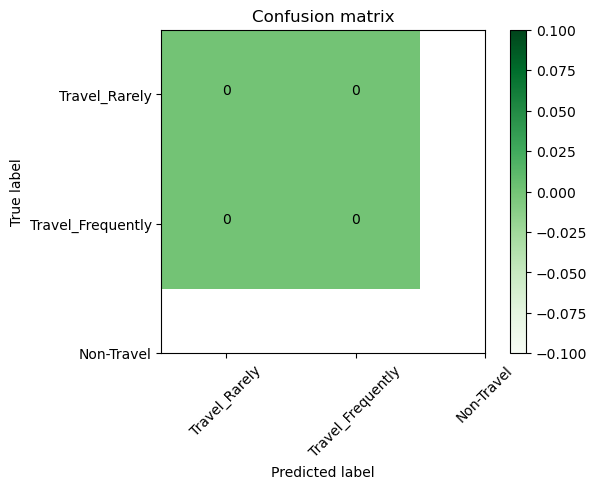

In [99]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred, labels=[2,4])
np.set_printoptions(precision=3)

print (classification_report(y_test, pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=["Travel_Rarely", "Travel_Frequently", "Non-Travel"], normalize= False,  title='Confusion matrix')

#### Using the f1 Score

In [102]:
from sklearn.metrics import f1_score

f1_score(y_test, pred, average = "weighted")

0.5182906630069567

In [111]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.6548672566371682